# NLP Project - Binary Classification

Amanda Kane - i6173978
Silvia Fallone - i6152013

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split    #to split train/validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Extract the training data

In [89]:
df_all = pd.read_csv('AllData.csv', encoding='latin-1')
df_all.columns = ['polarity','ID','date','query','username','tweet']
#df_all

In [121]:
data_index = []
#Index of the first 100.000 negative tweets
for i in range(10000):
    data_index.append(i)
#Index of the last 100.000 positive tweets
#for i in range(1499999,1599999):
for i in range(1589998,1599999):
    data_index.append(i)

#Put the data in the data frame into a csv file
df_train = df_all.loc[data_index,['polarity','tweet']]

#Fixing the indexing (reset_index was not working)
df_train.to_csv('train_data.csv')
df_train = pd.read_csv('train_data.csv', encoding='latin-1')
df_train.columns = ['drop','polarity','tweet']
df_train = df_train.drop(['drop'], axis = 1)

# Extract the test data

In [122]:
test_data_index = []
#Index of the 10000th to 15000th tweet (negative)
for i in range(20000,25000):
    test_data_index.append(i)
#Index of the last 15000th to last and 10000th to last positive tweets
for i in range(1500000,1505000):
    test_data_index.append(i)

#Put the data in the data frame into a csv file
df_test = df_all.loc[test_data_index,['polarity','tweet']]

#Fixing the indexing (reset_index was not working)
df_test.to_csv('test_data.csv')
df_test = pd.read_csv('test_data.csv', encoding='latin-1')
df_test.columns = ['drop','polarity','tweet']
df_test = df_test.drop(['drop'], axis = 1)
#df_test = df_test.drop(['polarity'], axis = 1)

# Helper Functions

In [ ]:
# represent a confusion matrix
def cm_represent(matrix):
    df_cm = pd.DataFrame(matrix, index = ['Positive','Negative'],
                      columns = ['Positive','Negative'])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [124]:
#clean the data
def clean(text, stem_words=True):
    import re    # for regular expressions
    from string import punctuation 
    from nltk.stem import SnowballStemmer    
    from nltk.corpus import stopwords      #if you want to remove stopwords
    from nltk.tokenize import word_tokenize 
    #import nltk
    # Empty question
    #nltk.download()
    if type(text) != str or text=='':
        return ''
    
    # Clean the text (here i have 2-3 cases of pre-processing by sampling the data. You might need more)
    text = text.lower() #change to lower case
    text = re.sub("@\w+ ","", text) #removes all usernames in text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub('[^a-zA-Z]', ' ', text)  #remove numbers
    text = re.sub(r'\s+', ' ', text)      
    text = re.sub(r'[^\w\s]','',text)     #remove commas
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text) # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub("[!~#$+%*:()'?-]", ' ', text)   # remove characters stated below
       

    #remove stopwords UNCOMMENT TO SEE IT'S IMPACT ON BAG OF WORDS
    #stop = re.compile(r'\b('+ r'|'.join(stopwords.words('english'))+r')\b\s*')
    #text = stop.sub('', text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    text = re.sub("[!~#$+%*:()'?-]", ' ', text) 
       
    ##Return a list of words
    return text

# Cleaning the data

The two following cells will show an example of the code before and after the cleaning. The first cell should always be executed as it performs the data cleaning on the dataset.

In [125]:
#training data cleaning
#print(df_train[401:411])
df_train['tweet'] = df_train['tweet'].apply(clean)

#This should give you the labels (y) for the training set
labels = df_train['polarity'].values
y = labels

#List of training tweets
tweets = df_train['tweet'].values

In [126]:
#doesn't necessarily have to be executed
#a = 401 
#for i in range(a,a+10):
    #print(df_train.tweet[i])
    #print()

In [127]:
#test data cleaning
df_test['tweet'] = df_test['tweet'].apply(clean)

#This should give you the labels (y) for the test set
test_labels = df_test['polarity'].values
test_y = test_labels

#List of test tweets
test_tweets = df_test['tweet'].values

# Performing the classification - Bag of Words

In [128]:
##### Simple CountVectorizer #####

#create the transform
vectorizer = CountVectorizer()

#build vocab
vec = vectorizer.fit(tweets) #we want to know all the words in both

#encode tweets
vec = vectorizer.transform(tweets)
#print(vec)

In [129]:
#encode test tweets
vecTestTweets = vectorizer.transform(test_tweets)
#print(vecTestTweets)

In [130]:
##### Näive-Bayes #####

#start timing
start = time.time()

#Näive-Bayes Classifier
classifier = MultinomialNB()
classifier.fit(vec,y)

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

Time: 0.00897526741027832 seconds


In [131]:
##### Näive-Bayes Prediction #####

#start timing
start = time.time()

#retrieving prediction accuracy score of Näive-Bayes classifier
prediction = classifier.predict(vecTestTweets)
score = (classifier.score(vecTestTweets,test_y))*100
print('Näive Bayes score: '+ str(score) + '%')

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

Näive Bayes score: 74.71%
Time: 0.0049550533294677734 seconds


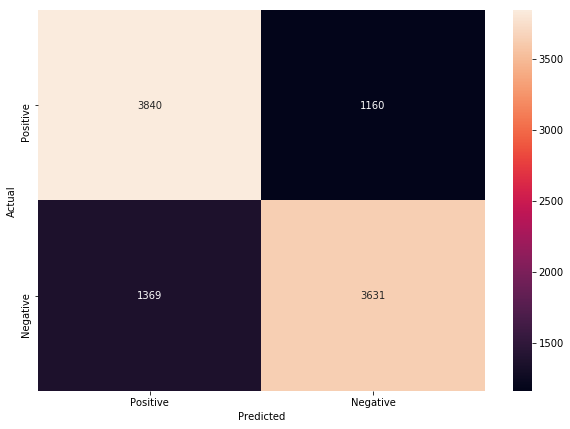

In [132]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

In [133]:
##### SVM #####

#start timing
start = time.time()

#SVM classifier
SVM_classifier = SVC(gamma='scale')
SVM_classifier.fit(vec,y)

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

Time: 171.82266855239868 seconds


In [134]:
##### SVM Prediction #####

#start timing
start = time.time()

#creating prediction vector/list
prediction = SVM_classifier.predict(vecTestTweets)
score = (SVM_classifier.score(vecTestTweets,test_y))*100

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

print("SVM score: " + str(score) + "%")

Time: 70.88169312477112 seconds
SVM score: 76.2%


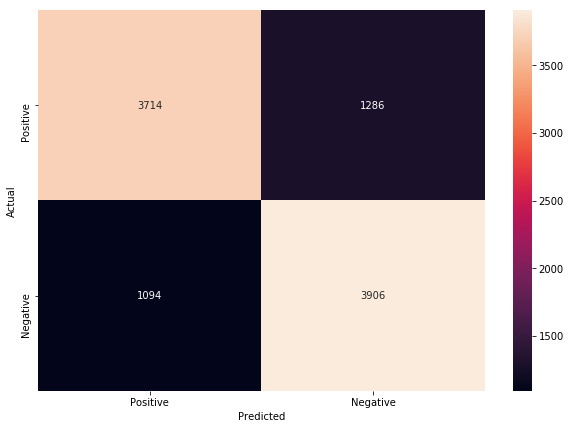

In [135]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

In [151]:
##### Logistic Regression #####

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',max_iter = 1000).fit(vec, y)
prediction = clf.predict(vecTestTweets)
score = (clf.score(vecTestTweets, test_y))*100

print("LogReg score: " + str(score) + "%")

LogReg score: 75.38%


In [ ]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

# Classification - TFIDF

In [141]:
##### TFIDF vectorizer####

#create the transform
T_vectorizer = TfidfVectorizer()

#build vocab
Tvec = T_vectorizer.fit(tweets) #we want to know all the words in both

#encode document
Tvec = T_vectorizer.transform(tweets)
#print(vec)

In [142]:
##### Näive-Bayes #####

#start timing
start = time.time()

#Näive-Bayes classifier
T_classifier = MultinomialNB()
T_classifier.fit(Tvec,y)

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

Time: 0.011967897415161133 seconds


In [143]:
#encode test tweets
T_vecTestTweets = T_vectorizer.transform(test_tweets)
#print(vecTestTweets)

In [144]:
##### Näive-Bayes Prediction #####

#start timing
start = time.time()

#creating prediction vector/list with Näive_Bayes classifier
prediction = T_classifier.predict(T_vecTestTweets)
score = (T_classifier.score(T_vecTestTweets,test_y))*100

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

print("TFIDF Näive_Bayes score: " + str(score) + "%")

Time: 0.01149296760559082 seconds
TFIDF Näive_Bayes score: 74.81%


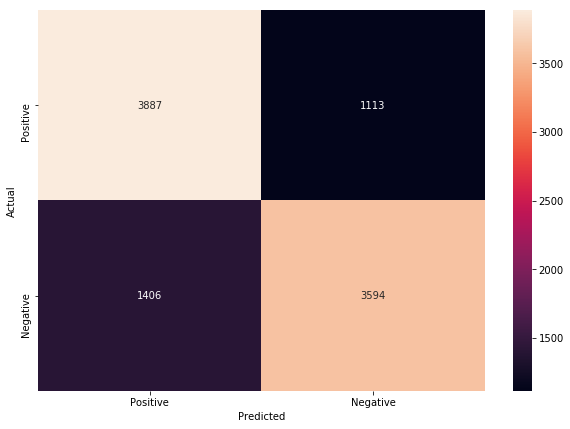

In [145]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

In [146]:
##### SVM #####

#start timing
start = time.time()

#SVM classifier
SVM_classifier = SVC(gamma='scale')
SVM_classifier.fit(Tvec,y)

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

Time: 201.3224606513977 seconds


In [147]:
##### SVM Prediction #####

#start timing
start = time.time()

#creating prediction vector/list
prediction = SVM_classifier.predict(T_vecTestTweets)
score = (SVM_classifier.score(T_vecTestTweets,test_y))*100

#stop timing
end = time.time()
print("Time: " + str(end - start) + " seconds")

print("TFIDF SVM score: " + str(score) + "%")

Time: 72.22917222976685 seconds
TFIDF SVM score: 76.57000000000001%


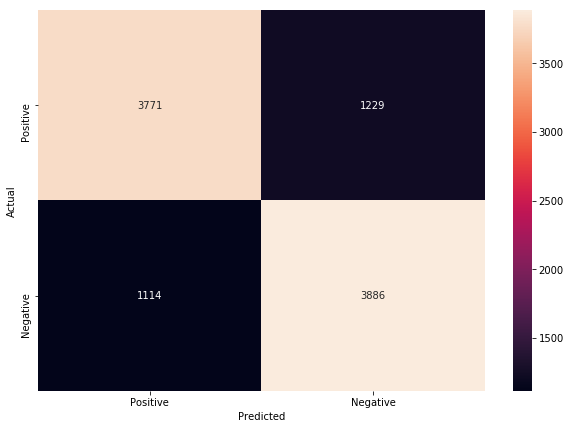

In [148]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

In [149]:
##### Logistic Regression #####

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(Tvec, y)
prediction = clf.predict(T_vecTestTweets)
score = (clf.score(T_vecTestTweets, test_y))*100

print("TFIDF LogReg score: " + str(score) + "%")

TFIDF LogReg score: 76.46%


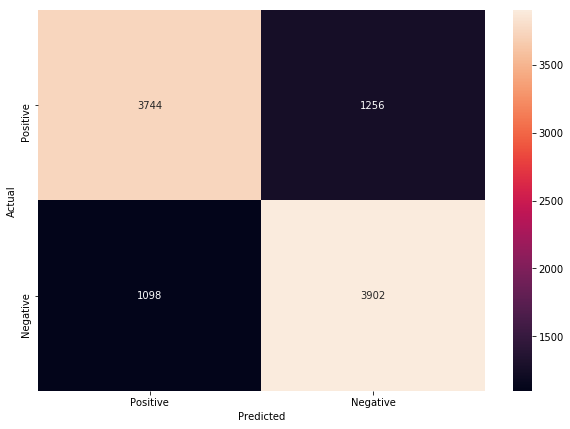

In [150]:
cmatrix = confusion_matrix(test_y,prediction)
cm_represent(cmatrix)

# Credits

In [ ]:
#Code provided by:

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#https://scikit-learn.org/stable/modules/svm.html#complexity
#https://www.geeksforgeeks.org/python-pandas-dataframe-append/
#https://xlsxwriter.readthedocs.io/
#https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
#https://www.guru99.com/python-regular-expressions-complete-tutorial.html
#https://www.tutorialspoint.com/data_mining/dm_rbc.htm